<a href="https://colab.research.google.com/github/zSoftwareRepository/MDS556/blob/main/Random_Forrest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libraries

import warnings
#warnings.filterwarnings("ignore")

seed = 23

import numpy as np
np.random.seed(seed)

import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features = ['usercreatedate','user_creationDate','smart_garage_camera_count','datediff_month','engaged_index',
            'numopenresponse','datediff_create_trans','engaged_prob','total_opens_last_90t180','ratio_open_30',
            'ratio_open_60','ratio_open_30t60','ratio_open_60t90','prob_mix_ro_60t90','prob_mix_ro_30t60']

In [4]:
def get_dummies(data,field,prefix):
    data[field] = data[field].fillna('na')
    dms = pd.get_dummies(data.loc[:,field], prefix=prefix)
    return pd.concat([data,dms],axis=1)

In [5]:
def toLog10(df,feature):    
    df[feature].fillna(0, inplace=True)
    return np.log10(df[feature]+1)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('drive/MyDrive/Elmhurst_Data/mydata.csv',low_memory=False)

Mounted at /content/drive


In [8]:
target = data[['target']]
target.columns=['target']
data = data[features]

In [9]:
data = data.replace(np.nan, 0)
#data.home_loan_amount = data.home_loan_amount * -1

In [10]:
# Split data 80% for training 20% for test

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=seed)
saved_cols = X_train.columns
y_train = y_train.values.ravel()

In [11]:
# Execute rendom forrest classifier

rf = RandomForestClassifier(min_samples_leaf=10,
                            n_estimators=500,
                            bootstrap=True,
                            oob_score=True,
                            n_jobs=-1,
                            random_state=seed)

result = rf.fit(X_train, y_train)

In [12]:
# make predictions for test data and evaluate

predictions = rf.predict_proba(X_test)[:,1]
#predictions = predictions[:,1]
preds_4errors = predictions.copy()
predictions = np.round(predictions,0)
accuracy = accuracy_score(y_test.target, predictions)

In [13]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1 Score: %.2f%%" % (f1_score(y_test.target, predictions) * 100.0))

Accuracy: 97.33%
F1 Score: 86.87%


In [14]:
# confusion m,atrix
tn, fp, fn, tp = confusion_matrix(y_test.target, predictions).ravel()
print(tn, fp, fn, tp)

44168 1214 120 4413


In [15]:
sensitivity = tp/(tp+fn)
print("True Positive Rate: %.2f%%" % (sensitivity * 100.0))
specificity = tn/(tn+fp)
print("True Negative Rate: %.2f%%" % (specificity * 100.0))

True Positive Rate: 97.35%
True Negative Rate: 97.32%


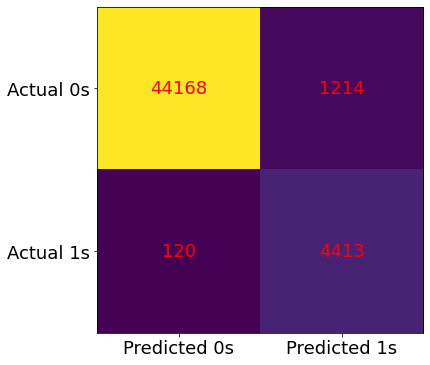

In [16]:
cm = confusion_matrix(y_test, predictions)

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=18)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [17]:
residuals = pd.DataFrame({'actual': y_test.target.values.flatten(), 'predicted': preds_4errors, 'residual': (y_test.target.values - preds_4errors)})

In [18]:
plt.rc("figure", figsize=(8, 4))
plt.rc("font", size=8)

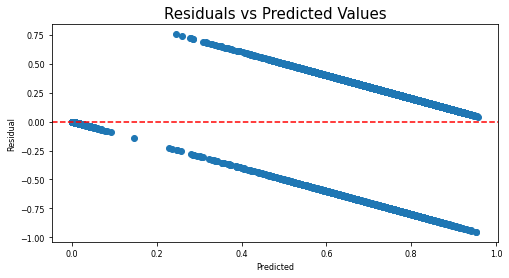

In [19]:
plt.scatter(residuals.predicted,residuals.residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Values', size=15)
plt.axhline(y=0, color="red", linestyle="--")
plt.show()

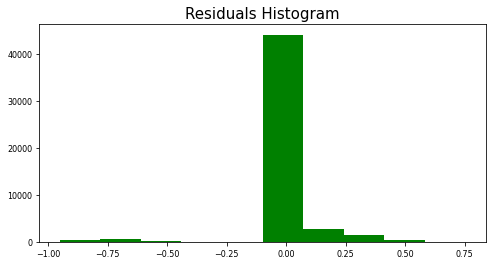

In [23]:
plt.title('Residuals Histogram', size=15)
_ = plt.hist(residuals.residual, bins=10, color = 'green')
plt.show()

In [ ]:
residuals

,actual,predicted,residual
0,1,0.639782,0.360218
1,0,0.000216,-0.000216
2,0,0.001836,-0.001836
3,0,0.001427,-0.001427
4,0,0.001769,-0.001769
...,...,...,...
49910,0,0.000571,-0.000571
49911,0,0.000890,-0.000890
49912,0,0.000576,-0.000576
49913,0,0.000111,-0.000111


In [ ]:
data[features]

In [ ]:
data

,index,usercreatedate,user_creationDate,age_1stperson_hushld,android_device_count,consumer_electronics,cooking_food_grp,electrnics_cmputrs_grp,exrcse_hlth_grp,gardening,...,ratio_keydeliveries_last_60,ratio_keydeliveries_last_90,ratio_keydeliveries_last_180,gender,prob_mix_ro_60t90,prob_mix_ro_30t60,auto_loans_index,bankcard_utilizn_index,zipcodecity,target
0,1,9.206435,9.206423,60,0,1,1,1,1,1,...,0.000000,0.000000,0.000000,M,0.941965,0.839253,58,43,28443hampsteadpender,0
1,2,9.214253,9.214238,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,unknown,0.194057,0.106059,unknown,unknown,66047lawrencedouglas,0
2,3,9.195456,9.195438,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,unknown,0.939713,0.889442,unknown,unknown,84096herrimansalt_lake,0
3,4,9.208629,9.208611,0,0,0,0,0,0,0,...,0.142857,0.142857,0.357143,unknown,0.061939,0.113539,unknown,unknown,48072berkleyoakland,0
4,5,9.190961,9.190941,0,2,0,0,0,0,0,...,0.000000,0.000000,0.000000,unknown,0.055210,0.088373,unknown,unknown,37221nashvilledavidson,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249570,249571,9.214305,9.214283,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,unknown,0.236868,0.252045,unknown,unknown,45013hamiltonbutler,0
249571,249572,9.215050,9.215039,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,unknown,0.876821,0.768786,unknown,unknown,45011hamiltonbutler,0
249572,249573,9.195811,9.195797,56,1,1,1,1,1,1,...,0.000000,0.000000,0.000000,F,0.742817,0.659772,45,14,49321comstock_parkkent,0
249573,249574,9.214690,9.214673,0,1,0,0,0,0,0,...,0.171429,0.342857,0.600000,unknown,0.083841,0.195663,unknown,unknown,48867owossoshiawassee,1


In [24]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=features)

In [25]:
forest_importances

usercreatedate              -0.000168
user_creationDate           -0.000200
smart_garage_camera_count    0.145097
datediff_month              -0.000142
engaged_index               -0.000132
numopenresponse             -0.000020
datediff_create_trans       -0.000142
engaged_prob                 0.000078
total_opens_last_90t180     -0.000014
ratio_open_30               -0.000248
ratio_open_60               -0.000258
ratio_open_30t60            -0.000118
ratio_open_60t90            -0.000138
prob_mix_ro_60t90           -0.000164
prob_mix_ro_30t60           -0.000154
dtype: float64

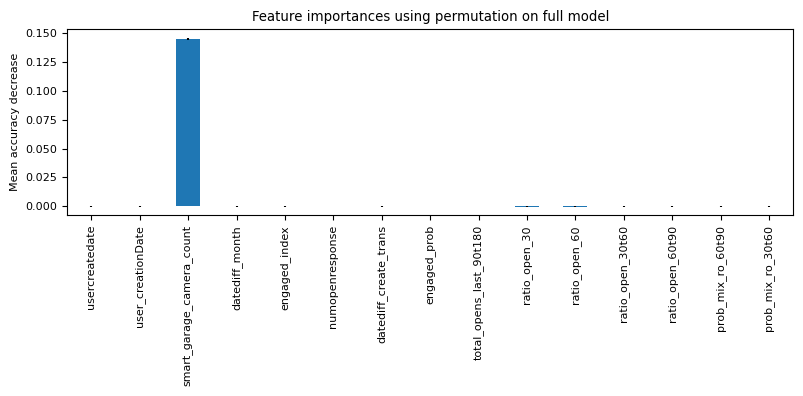

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()